In [1]:
import numpy as np
import pickle
np.random.seed(7)  # for reproducibility


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [3]:
import keras
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [4]:
import matplotlib.pyplot as plt
import os
import numpy

In [5]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict=pickle.load(fo, encoding='bytes')
    data=dict['data']
    data = data.reshape((-1, 32, 32, 3))
    labels=dict['label']
    return data, labels

In [6]:
def saveTest(your_predict_labels):
    f=open('testlabel.pickle','rb')
    labels=pickle.load(f)
    f.close()
  #here you must replace the labels that you have predicted for the test set:
    for i in range(len(labels)):
        labels[i]=your_predict_labels[i]
  #save the pickle file that you should upload:
    f=open('testlabel.pickle','wb')
    pickle.dump(labels,f)
    f.close()

In [7]:
X_train_label, Y_train_label =unpickle("trainset.pickle")
print(X_train_label.shape)


(9000, 32, 32, 3)


In [8]:
X_validation_label, Y_validation_label=unpickle("validset.pickle")

In [9]:
f=open('testset.pickle','rb')
dict=pickle.load(f)
f.close()
X_test_label=dict['data']
X_test_label = X_test_label.reshape((-1, 32, 32, 3))
X_test = X_test_label.astype('float32')

print(X_test_label.shape)

(3000, 32, 32, 3)


In [10]:
f=open('testlabel.pickle','rb')
Y_test_label=pickle.load(f)
f.close()
Y_test=np_utils.to_categorical(Y_test_label, 10)


In [11]:
X_train = X_train_label.astype('float32')
X_validation = X_validation_label.astype('float32')


Y_train = np_utils.to_categorical(Y_train_label, 10)
Y_validation = np_utils.to_categorical(Y_validation_label, 10)
print(X_train.shape)
for i in range(20):
    print(Y_train[i])

(9000, 32, 32, 3)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


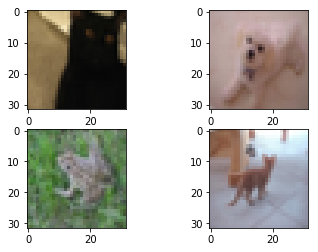

In [12]:
#image visualization
for i in range(4):
    img=X_train_label[i]
    img=img.reshape(-1,32,32).transpose([1,2,0])
    plt.subplot(2,2,i+1)
    plt.imshow(img)


In [13]:
# Parameter
num_classes = Y_train.shape[1]
batch_size = 128
epochs = 100
no_estimators = 5

In [14]:
# create CNN 6 conv layer & 2 Maxpooling layer 
def create_cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))

    model.add(BatchNormalization())
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
       
    model.add(Flatten())
    
   
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
    return model

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
  app.launch_new_instance()
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update yo

Instructions for updating:
Use tf.cast instead.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 15s - loss: 18.5331 - acc: 0.4570 - val_loss: 8.9333 - val_acc: 0.5433
Epoch 2/100
 - 3s - loss: 5.2808 - acc: 0.5821 - val_loss: 3.1590 - val_acc: 0.5657
Epoch 3/100
 - 3s - loss: 2.4316 - acc: 0.6059 - val_loss: 2.0405 - val_acc: 0.5667
Epoch 4/100
 - 3s - loss: 1.6892 - acc: 0.6391 - val_loss: 1.5844 - val_acc: 0.5883
Epoch 5/100
 - 3s - loss: 1.5295 - acc: 0.6449 - val_loss: 1.4818 - val_acc: 0.6027
Epoch 6/100
 - 3s - loss: 1.3984 - acc: 0.6620 - val_loss: 1.5837 - val_acc: 0.5817
Epoch 7/100
 - 3s - loss: 1.3288 - acc: 0.6680 - val_loss: 1.3159 - val_acc: 0.6420
Epoch 8/100
 - 3s - loss: 1.3268 - acc: 0.6821 - val_loss: 1.3084 - val_acc: 0.6437
Epoch 9/100
 - 3s - loss: 1.3270 - acc: 0.6937 - val_loss: 1.3578 - val_acc: 0.6643
Epoch 10/100
 - 3s - loss: 1.2921 - acc: 0.7022 - val_loss: 1.3182 - val_acc: 0.6607
Epoch 11/100
 - 3s - loss: 1.3317 - acc: 0.7117 - val_loss: 1.5977 - val_acc: 0.6127
Epoch 12/100
 - 3s - los

Epoch 97/100
 - 3s - loss: 0.2713 - acc: 0.9737 - val_loss: 1.4811 - val_acc: 0.7183
Epoch 98/100
 - 3s - loss: 0.2500 - acc: 0.9754 - val_loss: 1.4161 - val_acc: 0.7180
Epoch 99/100
 - 3s - loss: 0.2243 - acc: 0.9756 - val_loss: 1.3587 - val_acc: 0.6987
Epoch 100/100
 - 3s - loss: 0.2271 - acc: 0.9804 - val_loss: 1.3770 - val_acc: 0.7253
3000/3000 [==============================] - 1s 317us/step

Test Accuracy: 0.8107


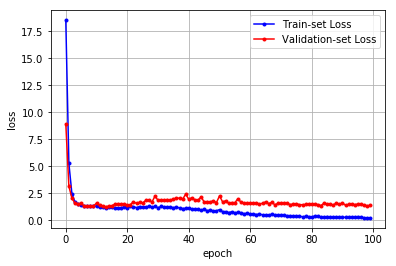

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 12s - loss: 18.6875 - acc: 0.4769 - val_loss: 8.9042 - val_acc: 0.5943
Epoch 2/100
 - 3s - loss: 5.4073 - acc: 0.5954 - val_loss: 3.2969 - val_acc: 0.5967
Epoch 3/100
 - 3s - loss: 2.4827 - acc: 0.6171 - val_loss: 1.9380 - val_acc: 0.6030
Epoch 4/100
 - 3s - loss: 1.7656 - acc: 0.6322 - val_loss: 1.5744 - val_acc: 0.6413
Epoch 5/100
 - 3s - loss: 1.5178 - acc: 0.6537 - val_loss: 1.5066 - val_acc: 0.6207
Epoch 6/100
 - 3s - loss: 1.4124 - acc: 0.6603 - val_loss: 1.3343 - val_acc: 0.6523
Epoch 7/100
 - 3s - loss: 1.3506 - acc: 0.6749 - val_loss: 1.4919 - val_acc: 0.6193
Epoch 8/100
 - 3s - loss: 1.4200 - acc: 0.6819 - val_loss: 1.2833 - val_acc: 0.6753
Epoch 9/100
 - 3s - loss: 1.2543 - acc: 0.6979 - val_loss: 1.1759 - val_acc: 0.6793
Epoch 10/100
 - 3s - loss: 1.2824 - acc: 0.6994 - val_loss: 1.2878 - val_acc: 0.6547
Epoch 11/100
 - 3s - loss: 1.4029 - acc: 0.7190 - val_loss: 1.3144 - val_acc: 0.6717
Epoch 12/100
 - 3s - los

Epoch 97/100
 - 3s - loss: 0.2526 - acc: 0.9740 - val_loss: 1.5145 - val_acc: 0.7040
Epoch 98/100
 - 3s - loss: 0.2367 - acc: 0.9751 - val_loss: 1.6227 - val_acc: 0.6883
Epoch 99/100
 - 3s - loss: 0.2451 - acc: 0.9753 - val_loss: 1.5432 - val_acc: 0.7100
Epoch 100/100
 - 3s - loss: 0.2582 - acc: 0.9712 - val_loss: 1.5398 - val_acc: 0.7040
3000/3000 [==============================] - 1s 192us/step

Test Accuracy: 0.7990


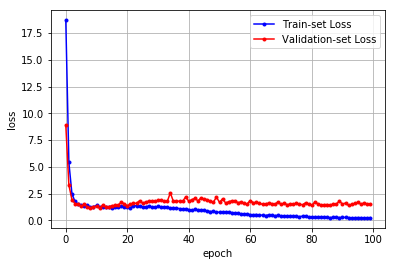

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 12s - loss: 18.8177 - acc: 0.4783 - val_loss: 9.5236 - val_acc: 0.4730
Epoch 2/100
 - 3s - loss: 5.2969 - acc: 0.5928 - val_loss: 3.0400 - val_acc: 0.5727
Epoch 3/100
 - 3s - loss: 2.3386 - acc: 0.6114 - val_loss: 2.1734 - val_acc: 0.5063
Epoch 4/100
 - 3s - loss: 1.7551 - acc: 0.6170 - val_loss: 1.9143 - val_acc: 0.5127
Epoch 5/100
 - 3s - loss: 1.4251 - acc: 0.6490 - val_loss: 1.4583 - val_acc: 0.5937
Epoch 6/100
 - 3s - loss: 1.3996 - acc: 0.6553 - val_loss: 1.4820 - val_acc: 0.6060
Epoch 7/100
 - 3s - loss: 1.3069 - acc: 0.6750 - val_loss: 1.2574 - val_acc: 0.6390
Epoch 8/100
 - 3s - loss: 1.2203 - acc: 0.6848 - val_loss: 1.2806 - val_acc: 0.6217
Epoch 9/100
 - 3s - loss: 1.1917 - acc: 0.7012 - val_loss: 1.3861 - val_acc: 0.6183
Epoch 10/100
 - 3s - loss: 1.1940 - acc: 0.7061 - val_loss: 1.2209 - val_acc: 0.6670
Epoch 11/100
 - 3s - loss: 1.1616 - acc: 0.7196 - val_loss: 1.2429 - val_acc: 0.6403
Epoch 12/100
 - 3s - los

Epoch 97/100
 - 3s - loss: 0.2367 - acc: 0.9771 - val_loss: 1.5615 - val_acc: 0.6973
Epoch 98/100
 - 3s - loss: 0.2447 - acc: 0.9754 - val_loss: 2.1760 - val_acc: 0.6173
Epoch 99/100
 - 3s - loss: 0.2575 - acc: 0.9733 - val_loss: 1.5608 - val_acc: 0.6870
Epoch 100/100
 - 3s - loss: 0.2444 - acc: 0.9767 - val_loss: 1.4348 - val_acc: 0.7117
3000/3000 [==============================] - 1s 169us/step

Test Accuracy: 0.7993


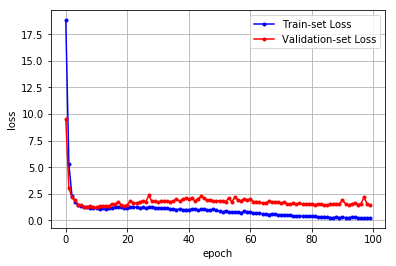

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 10s - loss: 18.5378 - acc: 0.4644 - val_loss: 8.9988 - val_acc: 0.5533
Epoch 2/100
 - 3s - loss: 5.2715 - acc: 0.5901 - val_loss: 3.1608 - val_acc: 0.5503
Epoch 3/100
 - 3s - loss: 2.4075 - acc: 0.6019 - val_loss: 2.1444 - val_acc: 0.5087
Epoch 4/100
 - 3s - loss: 1.7411 - acc: 0.6252 - val_loss: 1.6932 - val_acc: 0.5550
Epoch 5/100
 - 3s - loss: 1.5083 - acc: 0.6509 - val_loss: 1.5165 - val_acc: 0.6013
Epoch 6/100
 - 3s - loss: 1.3747 - acc: 0.6632 - val_loss: 1.4194 - val_acc: 0.5967
Epoch 7/100
 - 3s - loss: 1.3400 - acc: 0.6706 - val_loss: 1.4076 - val_acc: 0.6127
Epoch 8/100
 - 3s - loss: 1.2599 - acc: 0.6796 - val_loss: 1.2814 - val_acc: 0.6273
Epoch 9/100
 - 3s - loss: 1.2267 - acc: 0.6989 - val_loss: 1.6544 - val_acc: 0.5863
Epoch 10/100
 - 3s - loss: 1.2290 - acc: 0.7083 - val_loss: 1.2584 - val_acc: 0.6510
Epoch 11/100
 - 3s - loss: 1.2288 - acc: 0.7232 - val_loss: 1.3995 - val_acc: 0.6437
Epoch 12/100
 - 3s - los

Epoch 97/100
 - 3s - loss: 0.2335 - acc: 0.9760 - val_loss: 1.4900 - val_acc: 0.7083
Epoch 98/100
 - 3s - loss: 0.2535 - acc: 0.9739 - val_loss: 1.4060 - val_acc: 0.7067
Epoch 99/100
 - 3s - loss: 0.2359 - acc: 0.9758 - val_loss: 1.6621 - val_acc: 0.6843
Epoch 100/100
 - 3s - loss: 0.2521 - acc: 0.9739 - val_loss: 1.4670 - val_acc: 0.7217
3000/3000 [==============================] - 1s 189us/step

Test Accuracy: 0.8057


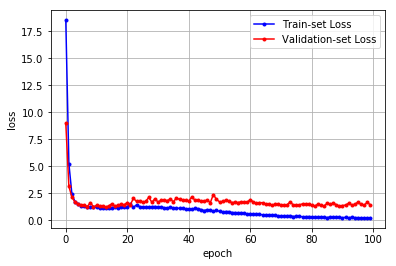

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 12s - loss: 17.9027 - acc: 0.4706 - val_loss: 8.1303 - val_acc: 0.5527
Epoch 2/100
 - 3s - loss: 4.8944 - acc: 0.5962 - val_loss: 3.3658 - val_acc: 0.5283
Epoch 3/100
 - 3s - loss: 2.3613 - acc: 0.6219 - val_loss: 1.9114 - val_acc: 0.6053
Epoch 4/100
 - 3s - loss: 1.7419 - acc: 0.6414 - val_loss: 1.6791 - val_acc: 0.5857
Epoch 5/100
 - 3s - loss: 1.4702 - acc: 0.6549 - val_loss: 1.4436 - val_acc: 0.6110
Epoch 6/100
 - 3s - loss: 1.4344 - acc: 0.6631 - val_loss: 1.4031 - val_acc: 0.6337
Epoch 7/100
 - 3s - loss: 1.2917 - acc: 0.6808 - val_loss: 1.2844 - val_acc: 0.6493
Epoch 8/100
 - 3s - loss: 1.2624 - acc: 0.6968 - val_loss: 1.2561 - val_acc: 0.6480
Epoch 9/100
 - 3s - loss: 1.2293 - acc: 0.7053 - val_loss: 1.1850 - val_acc: 0.6753
Epoch 10/100
 - 3s - loss: 1.1553 - acc: 0.7052 - val_loss: 1.1581 - val_acc: 0.6840
Epoch 11/100
 - 3s - loss: 1.1617 - acc: 0.7159 - val_loss: 1.2514 - val_acc: 0.6553
Epoch 12/100
 - 3s - los

Epoch 97/100
 - 3s - loss: 0.2712 - acc: 0.9732 - val_loss: 1.4328 - val_acc: 0.7113
Epoch 98/100
 - 3s - loss: 0.2322 - acc: 0.9747 - val_loss: 1.4053 - val_acc: 0.7047
Epoch 99/100
 - 3s - loss: 0.2331 - acc: 0.9759 - val_loss: 1.4091 - val_acc: 0.7237
Epoch 100/100
 - 3s - loss: 0.2517 - acc: 0.9738 - val_loss: 1.5615 - val_acc: 0.7133
3000/3000 [==============================] - 1s 217us/step

Test Accuracy: 0.8127


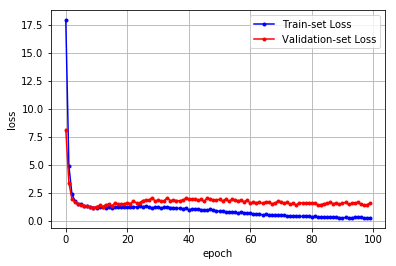

In [15]:
## ENSEMBLE MODELS
# Train many CNN models
for i in np.arange(no_estimators):
    # check point to save best model
    checkpoint = keras.callbacks.ModelCheckpoint('models_12/model_'+str(i)+'.h5', monitor='val_acc', \
            verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
    # clear GPU memory
    model = None
    K.clear_session()
    
    # train model
    model = create_cnn_model()
    history=model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=100, \
                batch_size=128, verbose=2, callbacks=[checkpoint])
    print("\nTest Accuracy: {:.4f}".format(model.evaluate(X_test, Y_test)[1]))
    y_vloss=history.history['val_loss']
    y_loss=history.history['loss']
    
    x_len=numpy.arange(len(y_loss))
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [18]:
# Check individual scores - val_acc and get list of the best models
score_list = []
score_list2 = []
score_list3=[]
model = create_cnn_model()
for i in np.arange(no_estimators):    
    model.load_weights('models_12/model_'+str(i)+'.h5')
    scores3= model.evaluate(X_test, Y_test, verbose=0)
    scores2= model.evaluate(X_train, Y_train, verbose=0)
    scores = model.evaluate(X_validation, Y_validation, verbose=0)
    score_list.append(scores[1])   #validation Acc
    score_list2.append(scores2[1])    #Train Acc
    score_list3.append(scores3[1])  #Test Acc
score_list = np.array(score_list)
score_list2= np.array(score_list2)
score_list3= np.array(score_list3)
score_list_filter = score_list >= 0.72 # threshold to select best model
print("Train Acc: "+str(score_list2))
print("Validation Acc: "+ str(score_list))
print("Test Acc: "+ str(score_list3))

print(score_list_filter)

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train Acc: [0.99344444 0.99811111 0.99211111 0.99855556 0.99933333]
Validation Acc: [0.728      0.71533333 0.717      0.73066667 0.72366667]
Test Acc: [0.814      0.80166667 0.785      0.79533333 0.807     ]
[ True False False  True  True]


In [20]:
# Ensemble predictions ~ val_err 16%
predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
predictions_test=np.zeros((Y_test.shape[0],Y_test.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False:
        continue
    #validation
    model.load_weights('models_12/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_validation, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]
    #Test
    prediction_test = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot_test = np_utils.to_categorical(prediction_test, 10)
    predictions_test = predictions_test + prediction_onehot_test*score_list3[i]

predictions_label = np.argmax(predictions, axis=1)
evaluate = np.equal(predictions_label, Y_validation_label)

predictions_label_test = np.argmax(predictions_test, axis=1)
evaluate_test = np.equal(predictions_label_test, Y_test_label)

print("Ensemble Validation_Error: %.2f%%" % (100-np.mean(evaluate)*100))
print("Ensemble Validation_Accuracy: %.2f%%" % (np.mean(evaluate)*100))

print("Ensemble Test_Error: %.2f%%" % (100-np.mean(evaluate_test)*100))
print("Ensemble Test_Accuracy: %.2f%%" % (np.mean(evaluate_test)*100))

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Ensemble Validation_Error: 24.57%
Ensemble Validation_Accuracy: 75.43%
Ensemble Test_Error: 15.20%
Ensemble Test_Accuracy: 84.80%


In [ ]:
## PERFORM PREDICTION ON TEST SET

X_test = X_test_label.astype('float32')

predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False: # skip bad model
        continue
    model.load_weights('models_12/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]

predictions_label = np.argmax(predictions, axis=1)
output = predictions_label.tolist()

with open('testlabel.pickle','wb') as f:
    pickle.dump(output, f)

pred = model.evaluate(X_test, Y_test)
print("test loss: ",pred[0]+"test acc: ",pred[1])